Campos de dados
A maioria dos campos é autoexplicativa. A seguir estão as descrições daqueles que não o são.

Id - um Id que representa um duple (Loja, Data) dentro do conjunto de teste

Loja – um ID exclusivo para cada loja

Vendas - o faturamento de um determinado dia (é isso que você está prevendo)

Clientes - o número de clientes em um determinado dia

Aberta - um indicador para saber se a loja estava aberta: 0 = fechada, 1 = aberta

StateHoliday – indica feriado estadual. Normalmente todas as lojas, com poucas exceções, fecham nos feriados estaduais. Observe que todas as escolas estão fechadas nos feriados e fins de semana. 

a = feriado, b = feriado de Páscoa, c = Natal, 0 = Nenhum

SchoolHoliday - indica se a (Loja, Data) foi afetada pelo fechamento de escolas públicas

StoreType  - diferencia entre 4 modelos de loja diferentes: a, b, c, d

Sortimento - descreve um nível de sortimento: a = básico, b = extra, c = estendido

CompetitionDistance - distância em metros até a loja concorrente mais próxima

CompetitionOpenSince[Month/Year] - fornece o ano e mês aproximados da hora em que o concorrente mais próximo foi aberto

Promoção - indica se uma loja está realizando uma promoção naquele dia

Promo2 - Promo2 é uma promoção contínua e consecutiva para algumas lojas: 0 = loja não participa, 1 = loja participa


Promo2Since[Ano/Semana] - descreve o ano e a semana do calendário em que a loja começou a participar da Promo2

PromoInterval - descreve os intervalos consecutivos de início da Promo2, nomeando os meses em que a promoção é reiniciada. Por exemplo, "fevereiro, maio, agosto, novembro" significa que cada 

rodada começa em fevereiro, maio, agosto e novembro de qualquer ano para aquela loja

# 0.0. IMPORTS

In [6]:
import pandas as pd
import numpy as np
import inflection
import math
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image
import datetime


## 0.1. HELPER FUNCTIONS

## 0.2. LOAD DATASETS

In [7]:
df_sales_raw = pd.read_csv('..//datasets//train.csv', low_memory=False)
df_store_raw = pd.read_csv('..//datasets//store.csv', low_memory=False)

#fulsao
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

# 1.0. DESCRIÇAO DE DADOS

https://www.kaggle.com/c/rossmann-store-sales/data

In [8]:
df1 = df_raw.copy()

## 1.1. Rename columns

In [9]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [10]:
old_cols = [ 'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
                'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval' ]

snakecase = lambda x: inflection.underscore( x )

new_cols= list( map( snakecase, old_cols ) ) 

#rename
df1.columns = new_cols

## 1.2. data Dimensions

In [11]:
print('Number of rows: {}'.format( df1.shape[0] ))
print('Number of cols: {}'.format( df1.shape[1] ))

Number of rows: 1017209
Number of cols: 18


## 1.3. data Types

In [12]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [13]:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA

In [14]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA
### resolvendo linhas com variaveis NAN

In [15]:
# resolvendo coluna por coluna ja que esse coluna ver os competidores mais proximos entao eu vou colocar um valor muito acima do maximo da coluna para demostra que nao a competiçao.
#competition_distance    
print(df1['competition_distance'].max()) 
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan( x ) else x)

75860.0


In [16]:
#competition_open_since_month
# se a coluna 'competition_open_since_month' for nan entao pegue o mes da coluna 'date' e coloque no lugar do nan se nao manteia o mes que ja tem na coluna 'competition_open_since_month'
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis=1)

In [17]:
#competition_open_since_year 
# se a coluna 'competition_open_since_year' for nan entao pegue o ano da coluna 'date' e coloque no lugar do nan se nao manteia o ano que ja tem na coluna 'competition_open_since_year'
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis=1)

In [18]:
#promo2_since_week
# quando nessa coluna o valor e nan quer dizer que esse coluna nao esta parteicipando da promoçao2 entao eu vou colocar a semana da 'date' da venda para que depois eu possa calcular a quanto 
#tempo essa promoçao esta desativa 
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'], axis=1)

In [19]:
#promo2_since_year 
# quando nessa coluna o valor e nan quer dizer que esse coluna nao esta parteicipando da promoçao2 entao eu vou colocar o ano da 'date' da venda para que depois eu possa calcular a quanto 
#tempo essa promoçao esta desativa 
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis=1)

In [20]:
#promo_interval
#
mouth_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec' }       

df1['promo_interval'].fillna(0, inplace=True)

df1['mouth_map'] = df1['date'].dt.month.map( mouth_map )

#se o 'mouth_map' esta dentro do intervalo do 'promo_interval' retorna 1 ou 0 em uma nova coluna chamada 'is_promo2' 1 mostrando que esta na promoçao e 0 que nao esta
df1['is_promo2'] = df1[['promo_interval', 'mouth_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['mouth_map'] in x['promo_interval'].split( ',' ) else 0 , axis=1)

/tmp/ipykernel_2573/4225278941.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['promo_interval'].fillna(0, inplace=True)


In [21]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
mouth_map                       0
is_promo2                       0
dtype: int64

## 1.6. chage types

In [22]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
mouth_map                               object
is_promo2                                int64
dtype: object

In [23]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int ) 
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int ) 

df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

df1.dtypes


store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
mouth_map                               object
is_promo2                                int64
dtype: object

## 1.7. Decriptive Statiscal

In [24]:
num_atributes = df1.select_dtypes(include=[ 'int64', 'float64' ])
cat_atributes = df1.select_dtypes(exclude=[ 'int64', 'float64', 'datetime64[ns]' ])

### 1.7.1 numerical Attributes

In [25]:
#Central Tendency - mean, median
ct1 = pd.DataFrame( num_atributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_atributes.apply( np.median ) ).T

#Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_atributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_atributes.apply( min ) ).T
d3 = pd.DataFrame( num_atributes.apply( max ) ).T
d4 = pd.DataFrame( num_atributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_atributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_atributes.apply( lambda x: x.kurtosis() ) ).T

#concatenate
m = pd.concat( [d2,d3,d4,ct1,ct2,d1,d5,d6] ).T.reset_index()
m.columns = ['Attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

m

,Attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


In [26]:
# Plota o gráfico de distribuição com tamanho personalizado
#sns.distplot(df1['competition_distance'])

In [27]:
#sns.distplot(df1['sales'])

## 1.7.2 A decriçao da tabela

Entendi, peço desculpas pela confusão. Aqui está a descrição em markdown de todos os 14 atributos:

**store:**
- Mínimo (Min): 1.0
- Máximo (Max): 1115.0
- Amplitude (Range): 1114.0
- Média (Mean): 558.429727
- Mediana (Median): 558.0
- Desvio Padrão (Std): 321.908493
- Assimetria (Skew): Praticamente simétrica (valor próximo de zero)
- Curtose (Kurtosis): Levemente achatada em relação à distribuição normal

**day_of_week:**
- Mínimo (Min): 1.0
- Máximo (Max): 7.0
- Amplitude (Range): 6.0
- Média (Mean): 3.998341
- Mediana (Median): 4.0
- Desvio Padrão (Std): 1.997390
- Assimetria (Skew): Praticamente simétrica (valor próximo de zero)
- Curtose (Kurtosis): Levemente achatada em relação à distribuição normal

**sales:**
- Mínimo (Min): 0.0
- Máximo (Max): 41551.0
- Amplitude (Range): 41551.0
- Média (Mean): 5773.818972
- Mediana (Median): 5744.0
- Desvio Padrão (Std): 3849.924283
- Assimetria (Skew): Ligeiramente assimétrica para a direita (skew > 0)
- Curtose (Kurtosis): Mais achatada e com caudas mais pesadas em comparação com a distribuição normal (kurtosis > 0)

**customers:**
- Mínimo (Min): 0.0
- Máximo (Max): 7388.0
- Amplitude (Range): 7388.0
- Média (Mean): 633.145946
- Mediana (Median): 609.0
- Desvio Padrão (Std): 464.411506
- Assimetria (Skew): Ligeiramente assimétrica para a direita (skew > 0)
- Curtose (Kurtosis): Mais achatada e com caudas mais pesadas em comparação com a distribuição normal (kurtosis > 0)

**open:**
- Mínimo (Min): 0.0
- Máximo (Max): 1.0
- Amplitude (Range): 1.0
- Média (Mean): 0.830107
- Mediana (Median): 1.0
- Desvio Padrão (Std): 0.375539
- Assimetria (Skew): Assimetria para a esquerda (skew < 0)
- Curtose (Kurtosis): Levemente mais achatada em relação à distribuição normal

**promo:**
- Mínimo (Min): 0.0
- Máximo (Max): 1.0
- Amplitude (Range): 1.0
- Média (Mean): 0.381515
- Mediana (Median): 0.0
- Desvio Padrão (Std): 0.485758
- Assimetria (Skew): Assimetria para a direita (skew > 0)
- Curtose (Kurtosis): Mais achatada e com caudas mais pesadas em comparação com a distribuição normal (kurtosis > 0)

**school_holiday:**
- Mínimo (Min): 0.0
- Máximo (Max): 1.0
- Amplitude (Range): 1.0
- Média (Mean): 0.178647
- Mediana (Median): 0.0
- Desvio Padrão (Std): 0.383056
- Assimetria (Skew): Assimetria para a direita (skew > 0)
- Curtose (Kurtosis): Levemente mais achatada em relação à distribuição normal

**competition_distance:**
- Mínimo (Min): 20.0
- Máximo (Max): 200000.0
- Amplitude (Range): 199980.0
- Média (Mean): 5935.442677
- Mediana (Median): 2330.0
- Desvio Padrão (Std): 12547.646829
- Assimetria (Skew): Assimetria para a direita (skew > 0)
- Curtose (Kurtosis): Mais achatada e com caudas mais pesadas em comparação com a distribuição normal (kurtosis > 0)

**competition_open_since_month:**
- Mínimo (Min): 1.0
- Máximo (Max): 12.0
- Amplitude (Range): 11.0
- Média (Mean): 6.786849
- Mediana (Median): 7.0
- Desvio Padrão (Std): 3.311085
- Assimetria (Skew): Praticamente simétrica (valor próximo de zero)
- Curtose (Kurtosis): Levemente achatada em relação à distribuição normal

**competition_open_since_year:**
- Mínimo (Min): 1900.0
- Máximo (Max): 2015.0
- Amplitude (Range): 115.0
- Média (Mean): 2010.324840
- Mediana (Median): 2012.0
- Desvio Padrão (Std): 5.515591
- Assimetria (Skew): Assimetria para a esquerda (skew < 0)
- Curtose (Kurtosis): Mais achatada e com caudas mais pesadas em comparação com a distribuição normal (kurtosis > 0)

**promo2:**
- Mínimo (Min): 0.0
- Máximo (Max): 1.0
- Amplitude (Range): 1.0
- Média (Mean): 0.500564
- Mediana (Median): 1.0
- Desvio Padrão (Std): 0.500000
- Assimetria (Skew): Assimetria para a esquerda (skew < 0)
- Curtose (Kurtosis): Exatamente igual à distribuição normal (kurtosis = 0)

**promo2_since_week:**
- Mínimo (Min): 1.0
- Máximo (Max): 52.0
- Amplitude (Range): 51.0
- Média (Mean): 23.619033
- Mediana (Median): 22.0
- Desvio Padrão (Std): 14.310057
- Assimetria (Skew): Praticamente simétrica (valor próximo de zero)
- Curtose (Kurtosis): Levemente achatada em relação à distribuição normal

**promo2_since_year:**
- Mínimo (Min): 2009.0
- Máximo (Max): 2015.0
- Amplitude (Range): 6.0
- Média (Mean): 2012.793297
- Mediana (Median): 2013.0
- Desvio Padrão (Std): 1.662657
- Assimetria (Skew): Assimetria para a esquerda (skew < 0)
- Curtose (Kurtosis): Levemente mais achatada em relação à distribuição normal

**is_promo2:**
- Mínimo (Min): 0.0
- Máximo (Max): 1.0
- Amplitude (Range): 1.0
- Média (Mean): 0.165966
- Mediana (Median): 0.0
- Desvio Padrão (Std): 0.372050
- Assimetria (Skew): Assimetria para a direita (skew > 0)
- Curtose (Kurtosis): Levemente mais achatada em relação à distribuição normal

## 1.7.3 Categorical Attributes

In [28]:
cat_atributes.apply( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
mouth_map         12
dtype: int64

<Axes: xlabel='assortment', ylabel='sales'>

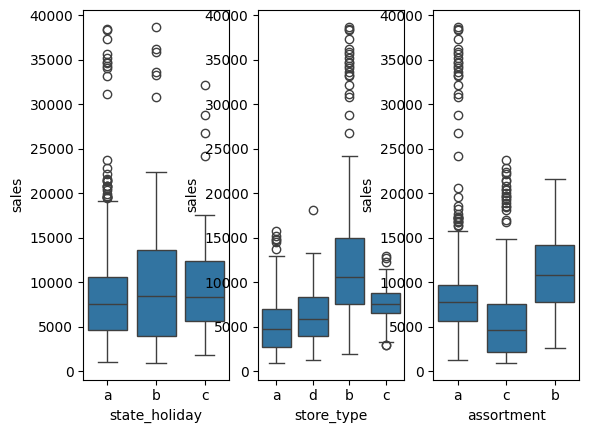

In [29]:
aux1 = df1[ (df1['state_holiday'] != '0' ) & ( df1['sales'] > 0 ) ] 

plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)

plt.subplot(1, 3, 2)
sns.boxplot(x='store_type', y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.boxplot(x='assortment', y='sales', data=aux1)

# 2.0 Features Engineering 


In [30]:
df2 = df1.copy()

## 2.1 Mapa Mental de Hipoteses

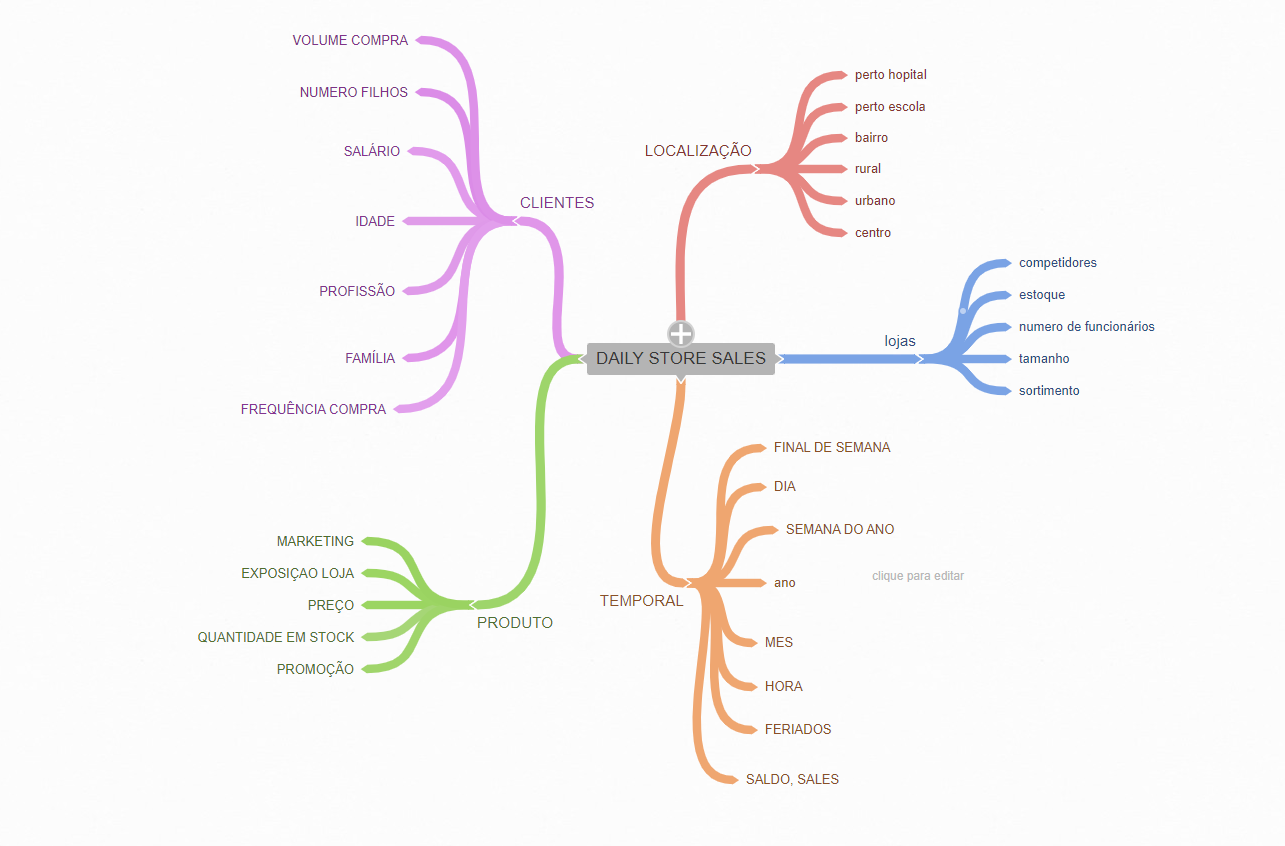

In [31]:
Image('..//img//mapa_hipotese.png')

## 2.1 Criaçao das Hipoteses
essas hipoteses sao criadas em uma reunião com todos os times da empresa. 

### 2.2.1 Hipoteses Lojas

**1.** lojas como maior quadro de funcionarios deveriam vender mais.  

**2.** lojas com maior estoque deveriam vender mais.

**3.** lojas com maior porte deveriam vender mais.

**4.** lojas com menor porte deveriam vender menos.

**5.** lojas com competidores mais proximos deveriam vender menos.

**6.** lojas com maior sortimento deveriam vender mais.

**7.** lojas com competidores a mais tempo deveriam vender mais.

### 2.2.2 Hipoteses Produtos

**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas que expoe mais o produto nas vitrines deveriam vender mais.

**3.** Lojas que tem preços menores nos produtos deveriam vender mais.

**4.** Lojas que tem preços menores por mais tempo nos produtos deveriam vender mais.

**5.** Lojas com promoções mais agressivas (maiores descontos), deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais.

**7.** Lojas com promoçoes ativas por mais tempo deveriam vender mais.

**8.** Lojas com mais dias de promoçao deveriam vender mais .

### 2.2.3 Hipoteses Tempo

**1.** Lojas que fecham nos feriados deveriam vender menos. 

**2.** Lojas que tem mais feriados deveriam vender menos. 

**3.** Lojas que abrem nos primeiros 6 meses deveriam vender mais. 

**4.** Lojas que abrem nos finais de semanas deveriam vender mais. 

**5.** Lojas deveriam vender mais depois do dia 10 do mes.

**6.** Lojas deveriam vender menos durantes feriados escolares.

## 2.2 Lista final de hipoteses (priorizando as hipoteses)


**1.** lojas com competidores mais proximos deveriam vender menos.

**2.** lojas com maior sortimento deveriam vender mais.

**3.** lojas com competidores a mais tempo deveriam vender mais.

**4.** Lojas com mais promoções consecutivas deveriam vender mais.

**5.** Lojas com promoçoes ativas por mais tempo deveriam vender mais.

**6.** Lojas com mais dias de promoçao deveriam vender mais .

**7.** Lojas que fecham nos feriados deveriam vender menos. 

**8.** Lojas que tem mais feriados deveriam vender menos. 

**9.** Lojas que abrem nos primeiros 6 meses deveriam vender mais. 

**10.** Lojas que abrem nos finais de semanas deveriam vender mais. 

**11.** Lojas deveriam vender mais depois do dia 10 do mes.

**12.** Lojas deveriam vender menos durantes feriados escolares.

**13.** Lojas deveriam vender mais no segundo semestre do ano

## 2.3 Features Engineering 

In [32]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day 
df2['day'] = df2['date'].dt.day

# week of year
#df2['week_of_year'] = df2['date'].dt.weekofyear 
df2['week_of_year'] = df2['date'].dt.isocalendar().week 

# year week
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )

# competition since
df2['conpetition_since'] = df2.apply( lambda x: datetime.datetime( year= x['competition_open_since_year'], month= x['competition_open_since_month'], day=1 ), axis=1)
df2['competition_time_month'] = ( ( df2['date'] - df2['conpetition_since'] )/30 ).apply( lambda x: x.days ).astype( int )

# promo since ( fazando a coluna com a quantidade semanas da promoçao)
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-W' + df2['promo2_since_week'].astype(str) + '-1'
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x, '%Y-W%W-%w') - datetime.timedelta(days=7))
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply( lambda x: x.days ).astype( int )

# assortment
df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended' )

# state holiday 
df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day'  )


In [33]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0. PASSO 3 - FILTRAGEM DE VARIÁVEIS

In [34]:
df3 = df2.copy()

In [35]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo2,year,month,day,week_of_year,year_week,conpetition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## 3.1 Filtragem das linhas 

In [36]:
df3.shape

(1017209, 29)

In [37]:
# as linhas que me intereçao sao so as diferentes de 0 pq 0 quer dizer que a loja esta fecha
df3 = df3[( df3['open'] != 0 ) & (df3['sales'] > 0)]
df3.shape

(844338, 29)

## 3.2. Seleção da colunas 

In [38]:
# retirando a customers pq ela nao e um dado que eu teria no momento de prediçao so teria esses dados quando a loja começace a vender
cols_drop = ['customers', 'open', 'promo_interval', 'mouth_map']
df3 = df3.drop( cols_drop, axis=1 )

In [39]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo2', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'conpetition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

# 4.0. PASSO 4 - ANALISE EXPLORATORIA DOS DADOS

In [40]:
df4 = df3.copy()

## 4.1. Analise Univariada

### 4.1.1. Response Variable

/tmp/ipykernel_2573/1017767876.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df4['sales'] );


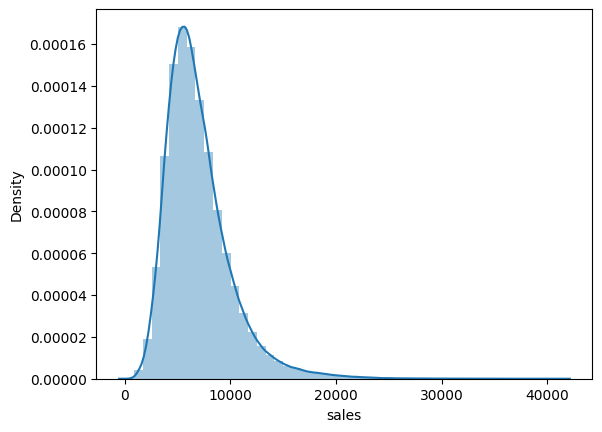

In [41]:
sns.distplot( df4['sales'] );

# normalizaçao dos dados
#sns.distplot( np.log1p( df4['sales'] ) )


### 4.1.2. Numerical Variable

/tmp/ipykernel_2573/388276008.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  num_atributes.hist(bins=25, ax=ax)


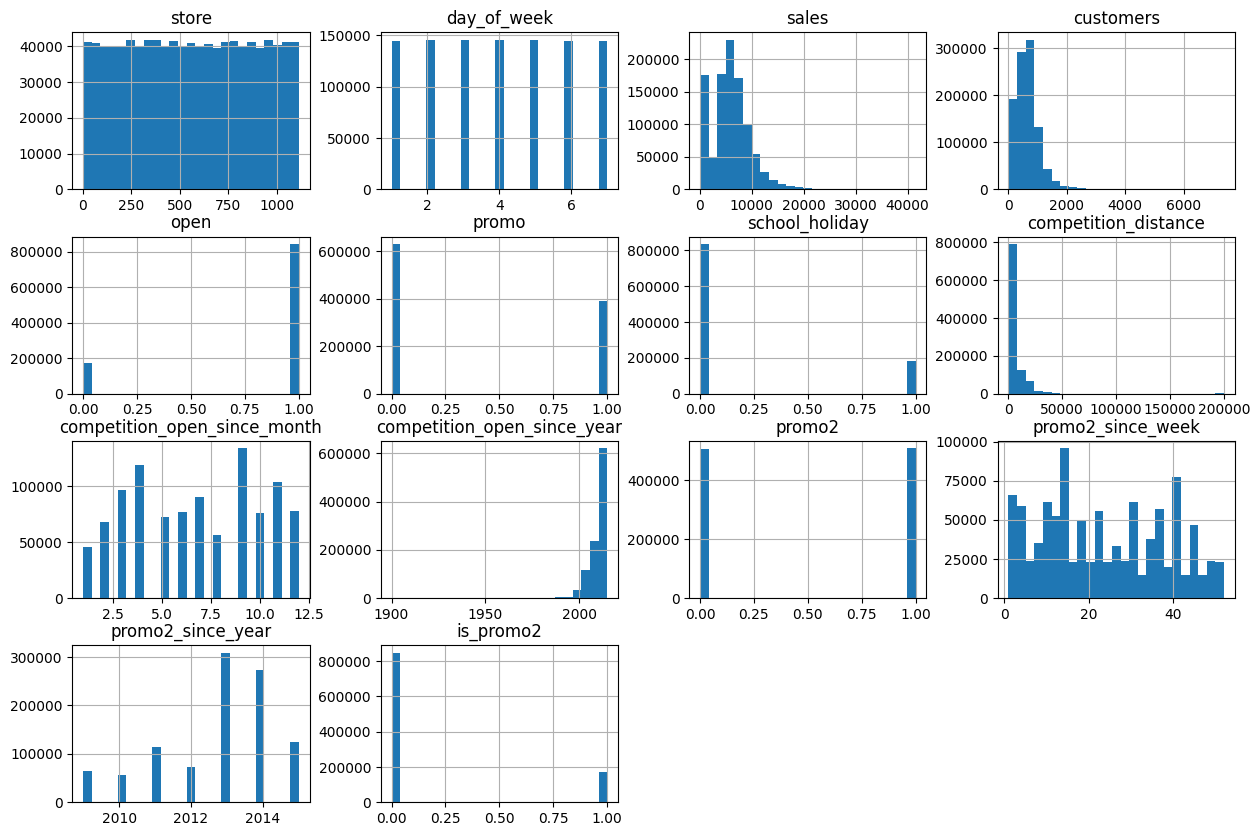

In [42]:
# Crie uma figura e eixos separados
fig, ax = plt.subplots(figsize=(15, 10))

# Gere o histograma nos eixos especificados
num_atributes.hist(bins=25, ax=ax)

# Exiba o gráfico
plt.show()


### 4.1.3 Categorical Variable

In [43]:
cat_atributes.head()

,state_holiday,store_type,assortment,promo_interval,mouth_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


In [44]:
df4['assortment'].drop_duplicates()

0         basic
3      extended
258       extra
Name: assortment, dtype: object

/tmp/ipykernel_2573/1663340254.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label='Public Holiday', shade=True)
/tmp/ipykernel_2573/1663340254.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'], label='Easter Holiday', shade=True)
/tmp/ipykernel_2573/1663340254.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'], label='Christmas', shade=True)
/tmp/ipykernel_2573/1663340254.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fi

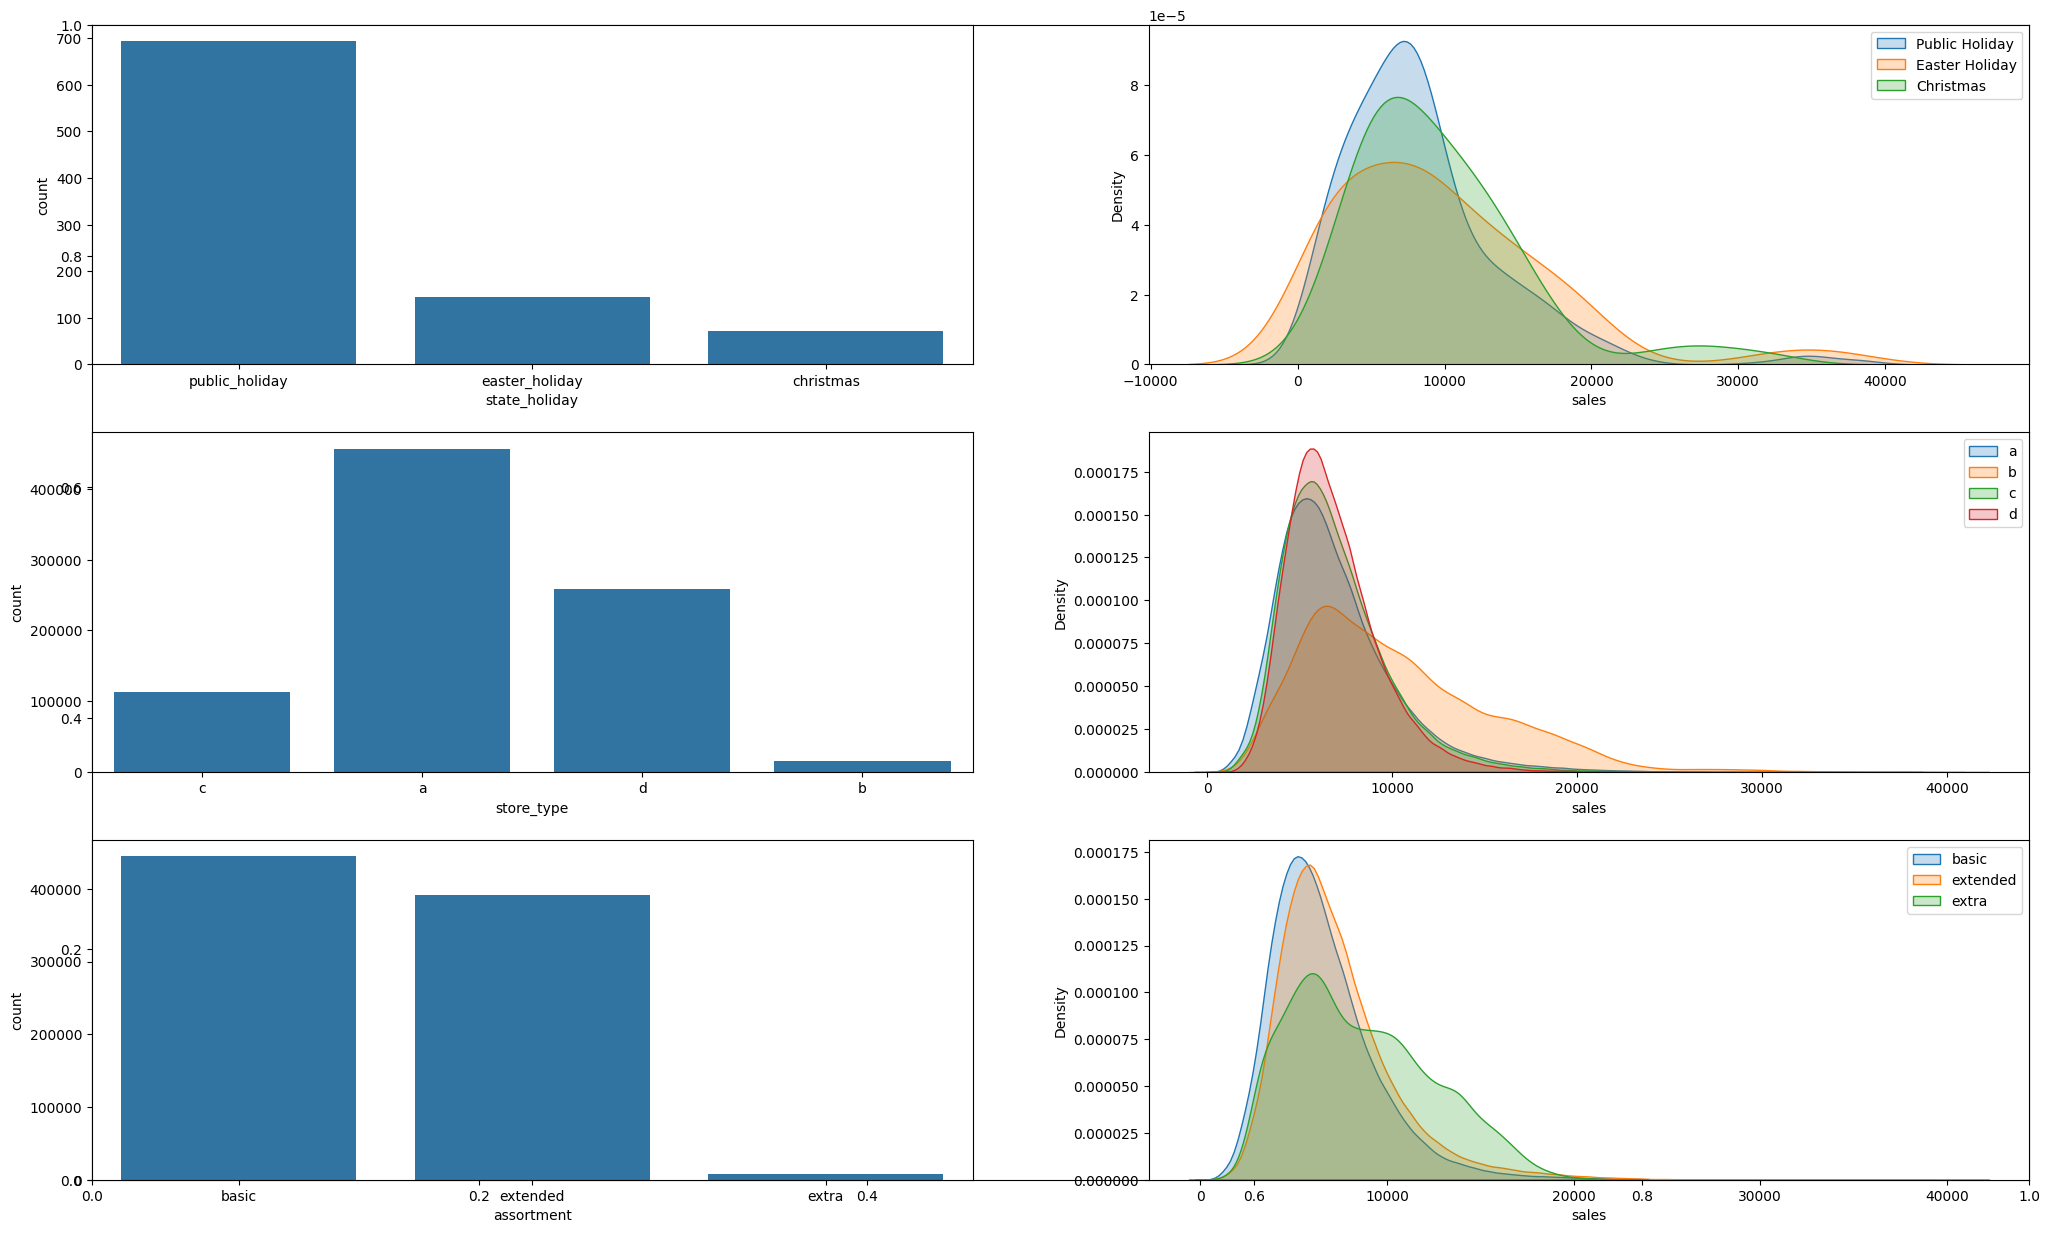

In [45]:
#state_holiday
fig, ax = plt.subplots(figsize=(25, 15))
plt.subplot( 3, 2, 1 )
a = df4[ df4['state_holiday'] != 'regular_day' ]
sns.countplot( x=a['state_holiday'])

plt.subplot( 3, 2, 2 )
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label='Public Holiday', shade=True)
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'], label='Easter Holiday', shade=True)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'], label='Christmas', shade=True)
plt.legend()

# store_type
plt.subplot( 3, 2, 3 )
sns.countplot( x=df4['store_type'])

plt.subplot( 3, 2, 4 )
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label='a', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label='b', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label='c', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label='d', shade=True)
plt.legend()

# assortment
plt.subplot( 3, 2, 5 )
sns.countplot( x=df4['assortment'])

plt.subplot( 3, 2, 6 )
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label='basic', shade=True)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label='extended', shade=True)
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label='extra', shade=True)
plt.legend()

# Exiba o gráfico
plt.show()

## 4.2. Análise Bivariada

### **H1.** lojas com maior sortimento (classificação) deveriam vender mais.
**FALSA:** Lojas com MAIOR SORTIMENTO vendem MENOS.


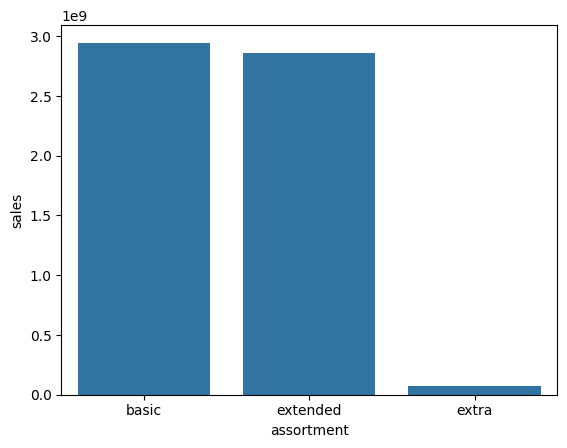

In [46]:
aux1 = df4[['assortment', 'sales']].groupby( 'assortment' ).sum().reset_index()
sns.barplot( x='assortment', y='sales', data=aux1 );

<Axes: xlabel='year_week'>

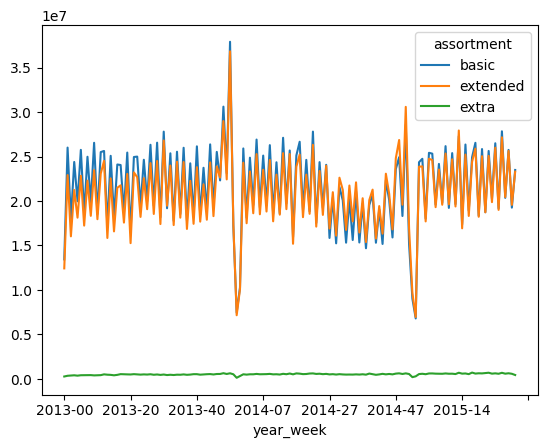

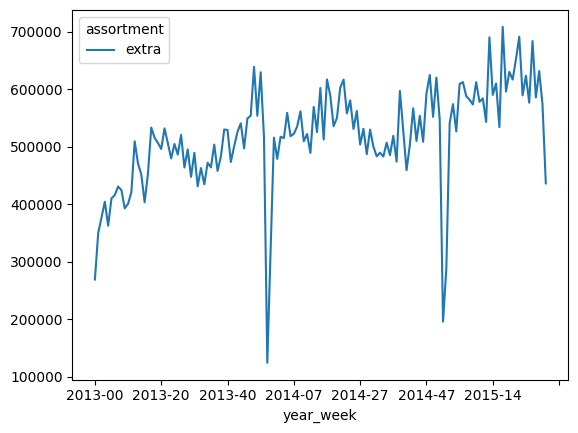

In [47]:
# com essa tabela acima esta dizendo que a hipotese e falsa 
# agora para validar de vez vamos ver se a soma de vendas por sortimento por semana para ver se a extra alguma semana ja foi a que mais vendeu para ver se essa hipotese ja fez sentido um dia
aux2 = df4[['year_week','assortment', 'sales']].groupby( ['year_week', 'assortment'] ).sum().reset_index()
aux2.pivot( index='year_week', columns='assortment', values='sales' ).plot()

# analisando o conportamento do assortment extra

aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot( index='year_week', columns='assortment', values='sales' ).plot()

### **H2.** lojas com competidores mais proximos deveriam vender menos.
**FALSA:** Lojas com COMPETIDORES MAIS PROXIMOS vendem MAIS.


/tmp/ipykernel_2573/2028597937.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aux2 = aux1[['competition_distance_binned', 'sales']].groupby( 'competition_distance_binned' ).sum().reset_index()


<Axes: >

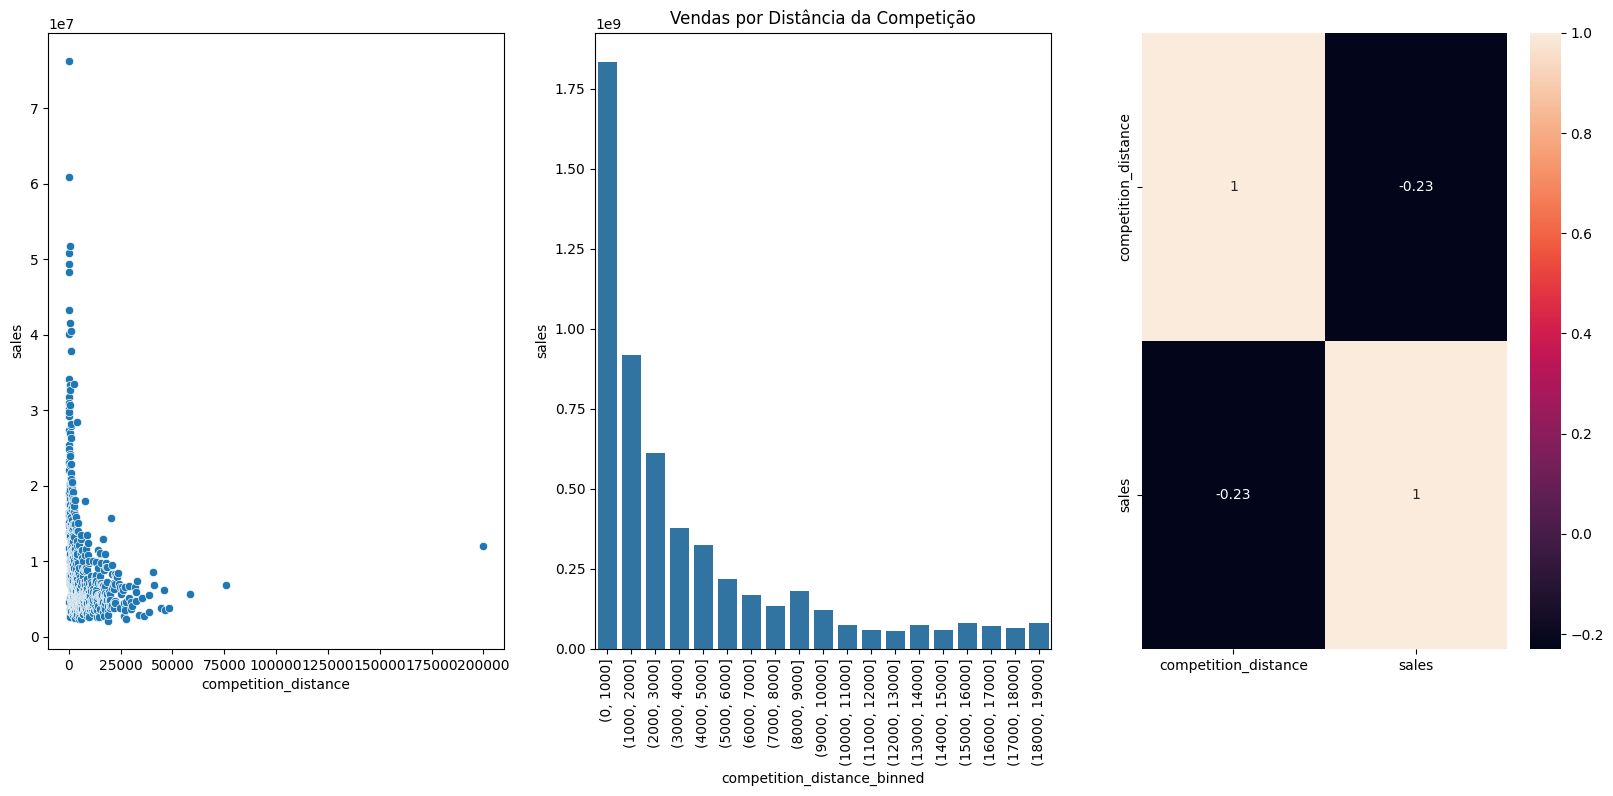

In [48]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()
sns.scatterplot(x='competition_distance', y='sales', data=aux1)

plt.subplot(1, 3, 2)
bins = list( np.arange( 0, 20000, 1000 ) )
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins=bins )
aux2 = aux1[['competition_distance_binned', 'sales']].groupby( 'competition_distance_binned' ).sum().reset_index()
#plt.figure(figsize=(12, 6))
sns.barplot(x='competition_distance_binned', y='sales', data=aux2)
plt.title('Vendas por Distância da Competição')
plt.xticks(rotation=90)


plt.subplot(1, 3, 3)
numeric_cols = aux1.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(method='pearson'), annot=True)




### **H3.** lojas com competidores a mais tempo deveriam vender mais.
**FALSE:** Lojas com COMPETIDORES A MAIS TEMPO vende MENOS

<Axes: >

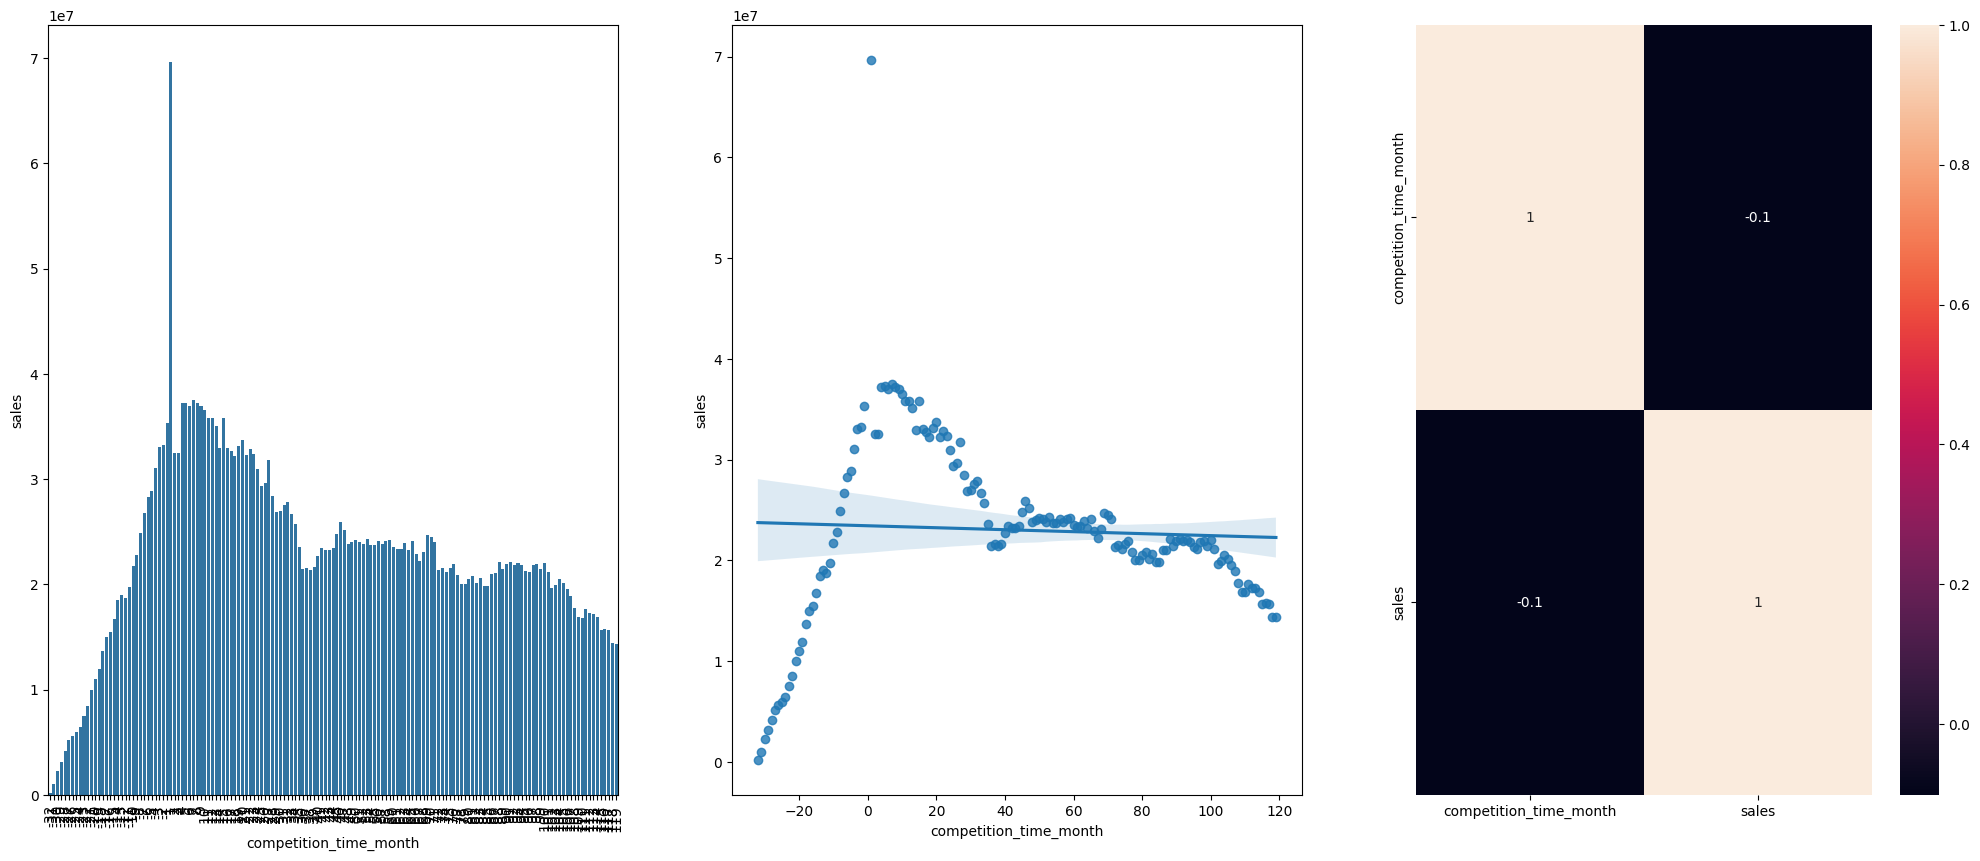

In [49]:
aux1 = df4[['competition_time_month', 'sales']].groupby( 'competition_time_month' ).sum().reset_index()
aux2 = aux1[ ( aux1['competition_time_month'] < 120 ) & ( aux1['competition_time_month'] != 0 ) ]
plt.figure(figsize=(25, 10))
plt.subplot(1, 3, 1)
sns.barplot(x='competition_time_month', y='sales', data=aux2)
plt.xticks( rotation=90 );

plt.subplot(1, 3, 2)
sns.regplot(x='competition_time_month', y='sales', data=aux2)

plt.subplot(1, 3, 3)
sns.heatmap( aux1.corr( method='pearson' ), annot=True )


### **H4.** Lojas com promoçoes ativas por mais tempo deveriam vender mais.
**FALSE:** Lojas com promoçoes ativas por mais tempo vendem menos

a feature 'promo_time_week' provavelmente nao vai ser colocada no algoritmo porque sua correlação e muito proximo de 0 entao e muito ruim a correlação

<Axes: >

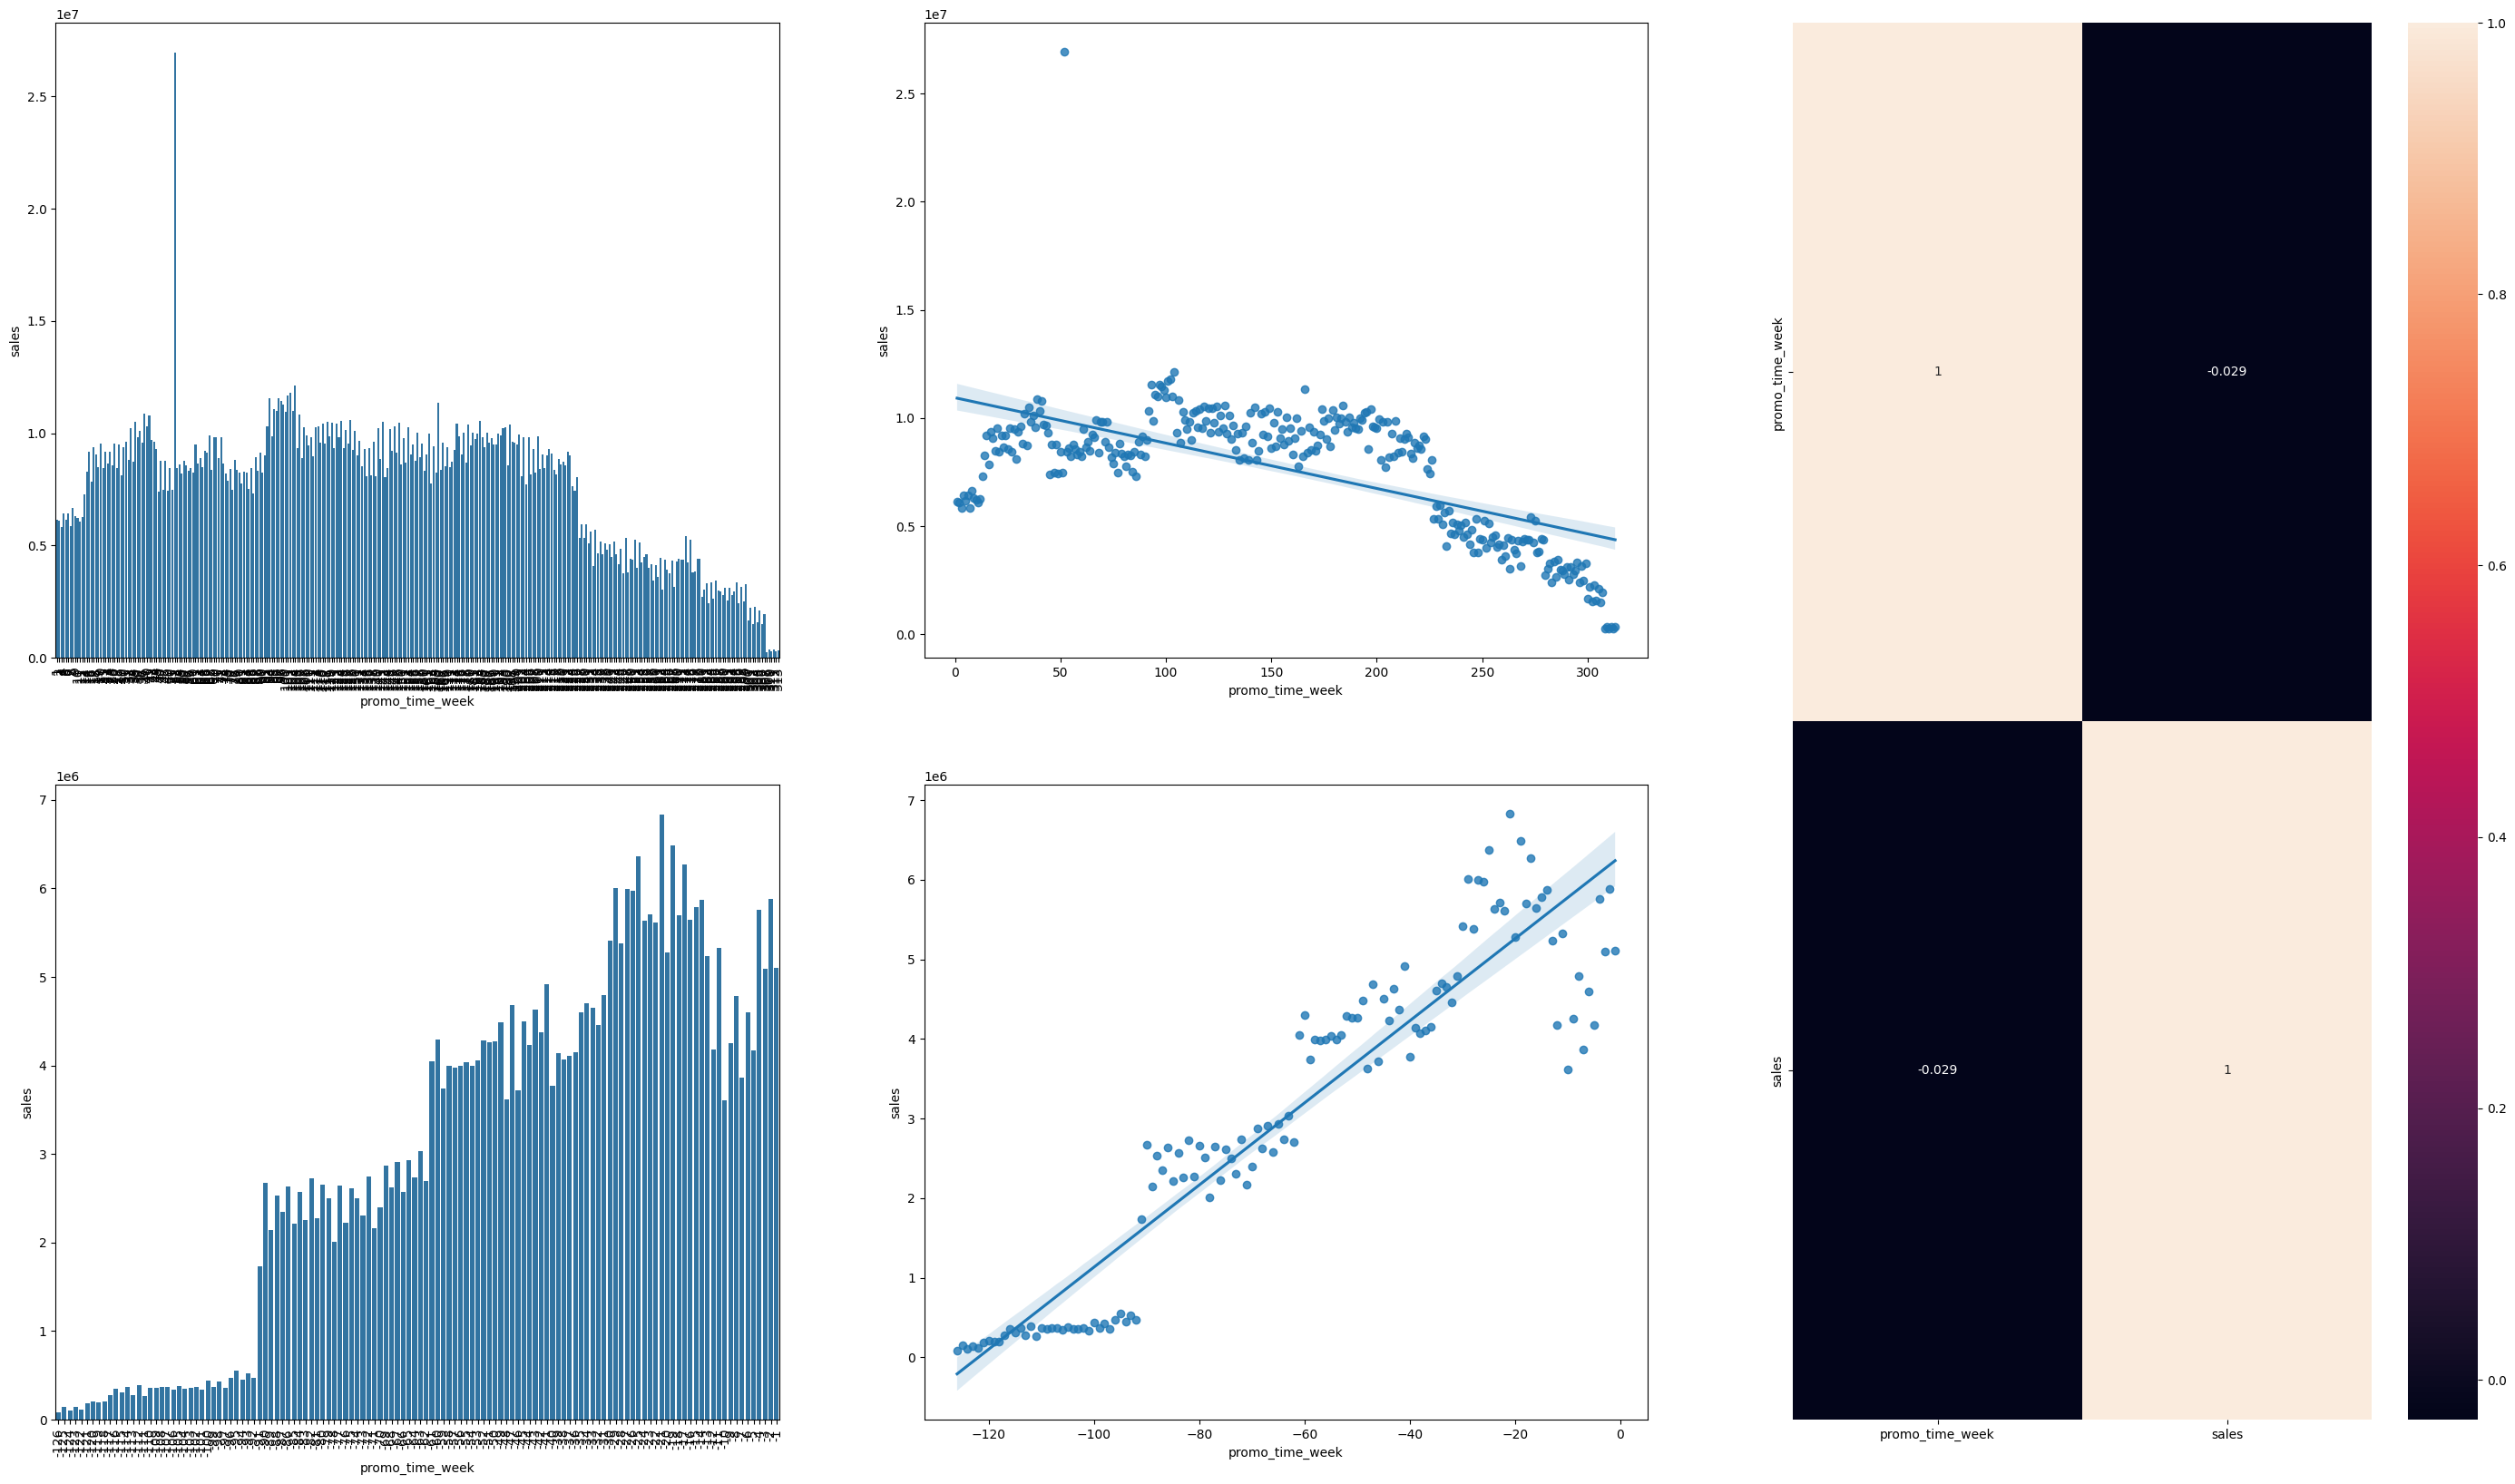

In [50]:
# 'promo_time_week':  coluna com a quantidade semanas da promoçao
aux1 = df4[['promo_time_week', 'sales']].groupby( 'promo_time_week' ).sum().reset_index()

grid = plt.GridSpec( 2, 3 )

plt.figure( figsize=[35, 20] )

plt.subplot( grid[0,0] )
aux2 = aux1[aux1['promo_time_week'] > 0 ]# promo extendida
sns.barplot( x='promo_time_week', y='sales', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( grid[0,1] )
sns.regplot( x='promo_time_week', y='sales', data=aux2 );

plt.subplot( grid[1,0] )
aux3 = aux1[aux1['promo_time_week'] < 0 ]# promo regular
sns.barplot( x='promo_time_week', y='sales', data=aux3 );
plt.xticks( rotation=90 );

plt.subplot( grid[1,1] )
sns.regplot( x='promo_time_week', y='sales', data=aux3 );

plt.subplot(grid[:,2])
sns.heatmap( aux1.corr( method='pearson' ), annot=True )

### <s>**H5.** Lojas com mais dias de promoçao deveriam vender mais.</s>

### **H6.** Lojas com mais promoções consecutivas deveriam vender mais.
**FALSE:** Lojas com mais promoções consecutivas vendem menos

In [51]:
df4[['promo', 'promo2', 'sales']].groupby( [ 'promo', 'promo2' ] ).sum().reset_index()

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


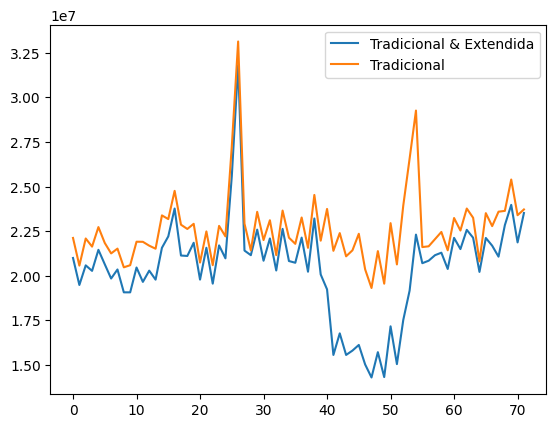

In [52]:
aux1 = df4[ ( df4['promo'] == 1 ) & ( df4['promo2'] == 1 ) ][['year_week', 'sales']].groupby(['year_week']).sum().reset_index()
ax = aux1.plot()

aux2 = df4[ ( df4['promo'] == 1 ) & ( df4['promo2'] == 0 ) ][['year_week', 'sales']].groupby(['year_week']).sum().reset_index()
aux2.plot( ax=ax )

ax.legend( labels=['Tradicional & Extendida', 'Tradicional']  )

### **H7.** Lojas abertas durante o feriado de natal deveriam vender mais. 
**FALSE:** Lojas abertas durante o feriado de natal vendem menos

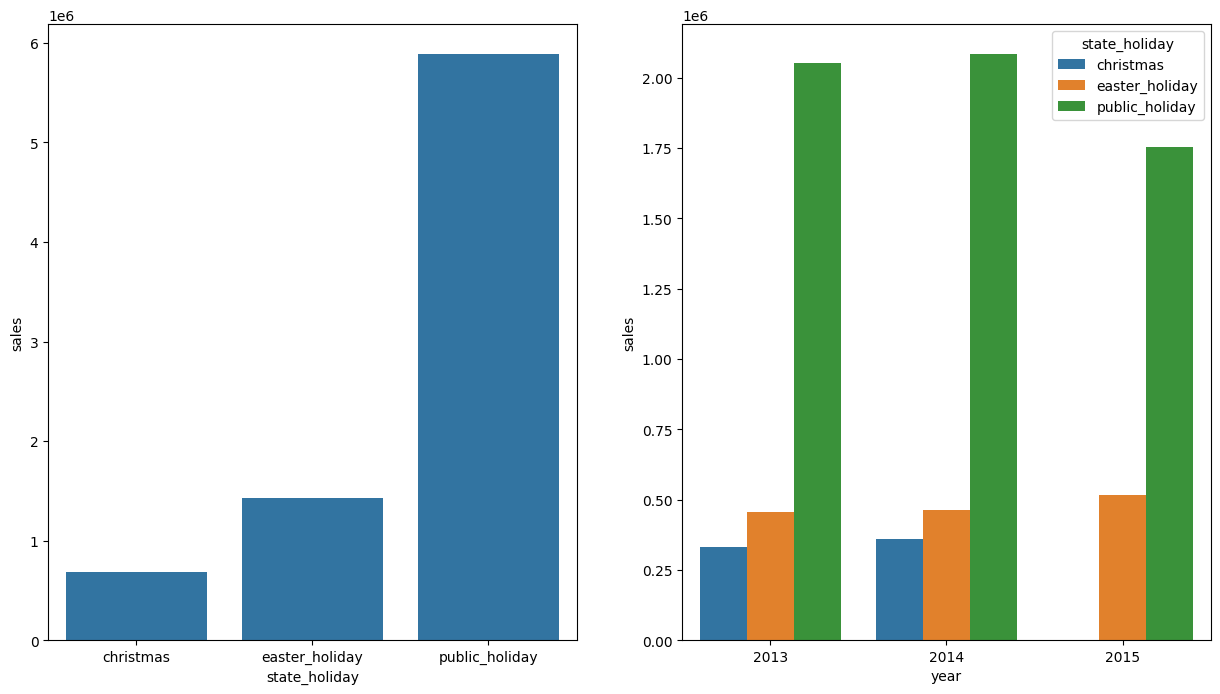

In [53]:
aux = df4[df4['state_holiday'] != 'regular_day' ]
plt.figure( figsize=[15,8] )
plt.subplot( 1, 2, 1 )
aux1 = aux[['state_holiday', 'sales']].groupby('state_holiday').sum().reset_index()  
sns.barplot( x='state_holiday', y='sales', data=aux1 );

plt.subplot( 1, 2, 2 )
aux2 =aux[['year', 'state_holiday', 'sales']].groupby( ['year', 'state_holiday'] ).sum().reset_index()
sns.barplot( x='year', y='sales', hue='state_holiday', data=aux2 );

### **H8.** Lojas deveriam vender mais ao logo dos anos. 
**FALSE:** Lojas estao vendendo menos com o passar dos anos

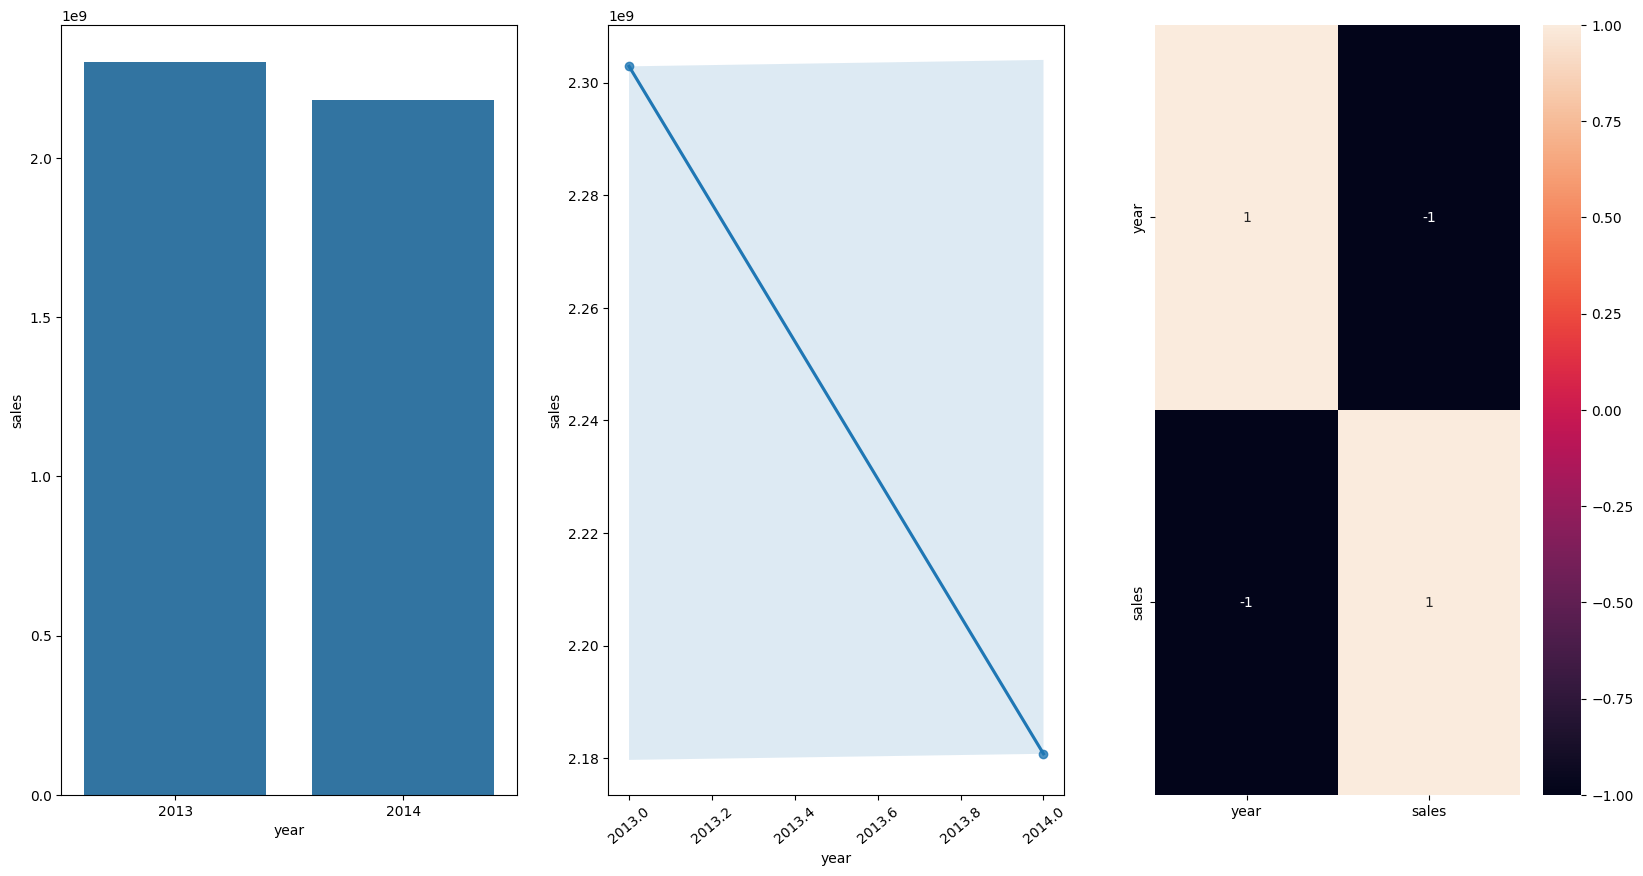

In [54]:
aux1 = df4[['year', 'sales']].groupby( 'year' ).sum().reset_index()
aux1 = aux1[aux1['year'] != 2015] # retirando 2015 esses dados vão so até agosto de 2015 entao ele vai dar menor venda de qualquer jeito pq o ano ainda nao acobou
 
plt.figure( figsize=[20,10] )
plt.subplot(1, 3, 1)
sns.barplot( x='year', y='sales', data=aux1 )

plt.subplot(1, 3, 2)
sns.regplot( x='year', y='sales', data=aux1 )
plt.xticks( rotation=40 );

plt.subplot(1, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

### **H9.** Lojas deveriam vender mais no segundo semestre do ano. 
**FALSE:** lojas vendem menos no segundo semestre do ano 

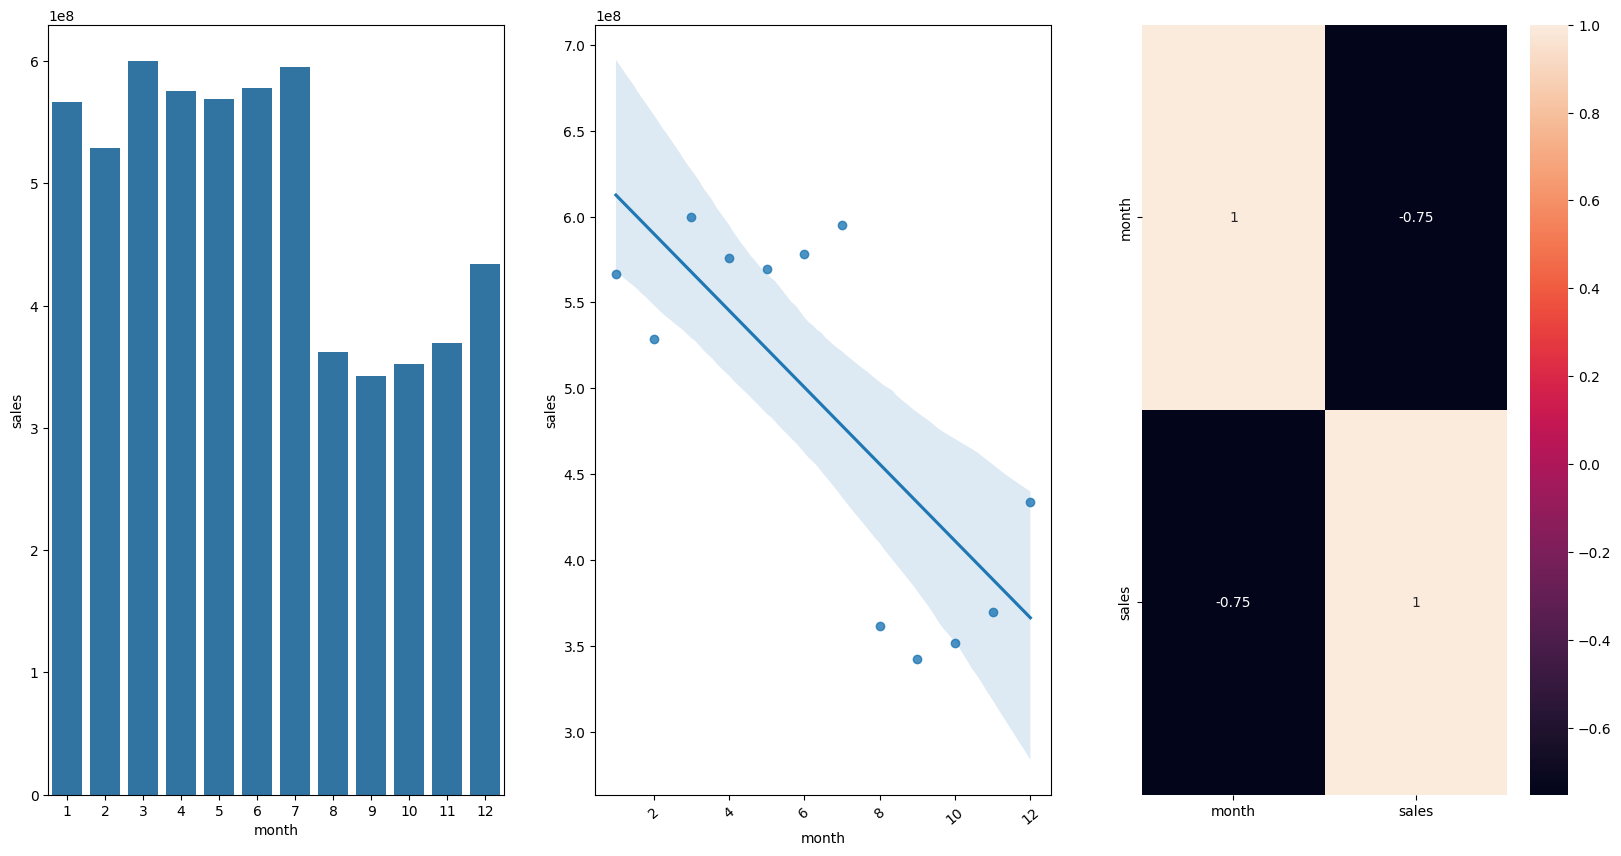

In [55]:
aux1 = df4[['month', 'sales']].groupby( 'month' ).sum().reset_index()

plt.figure( figsize=[20,10] )
plt.subplot(1, 3, 1)
sns.barplot( x='month', y='sales', data=aux1 )

plt.subplot(1, 3, 2)
sns.regplot( x='month', y='sales', data=aux1 )
plt.xticks( rotation=40 );

plt.subplot(1, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

### **H10.** Lojas deveriam vender mais depois do dia 10 do mes.
**VERDADEIRO:** Lojas vendem mais depois do dia 10 de cada mes

<Axes: xlabel='before_after', ylabel='sales'>

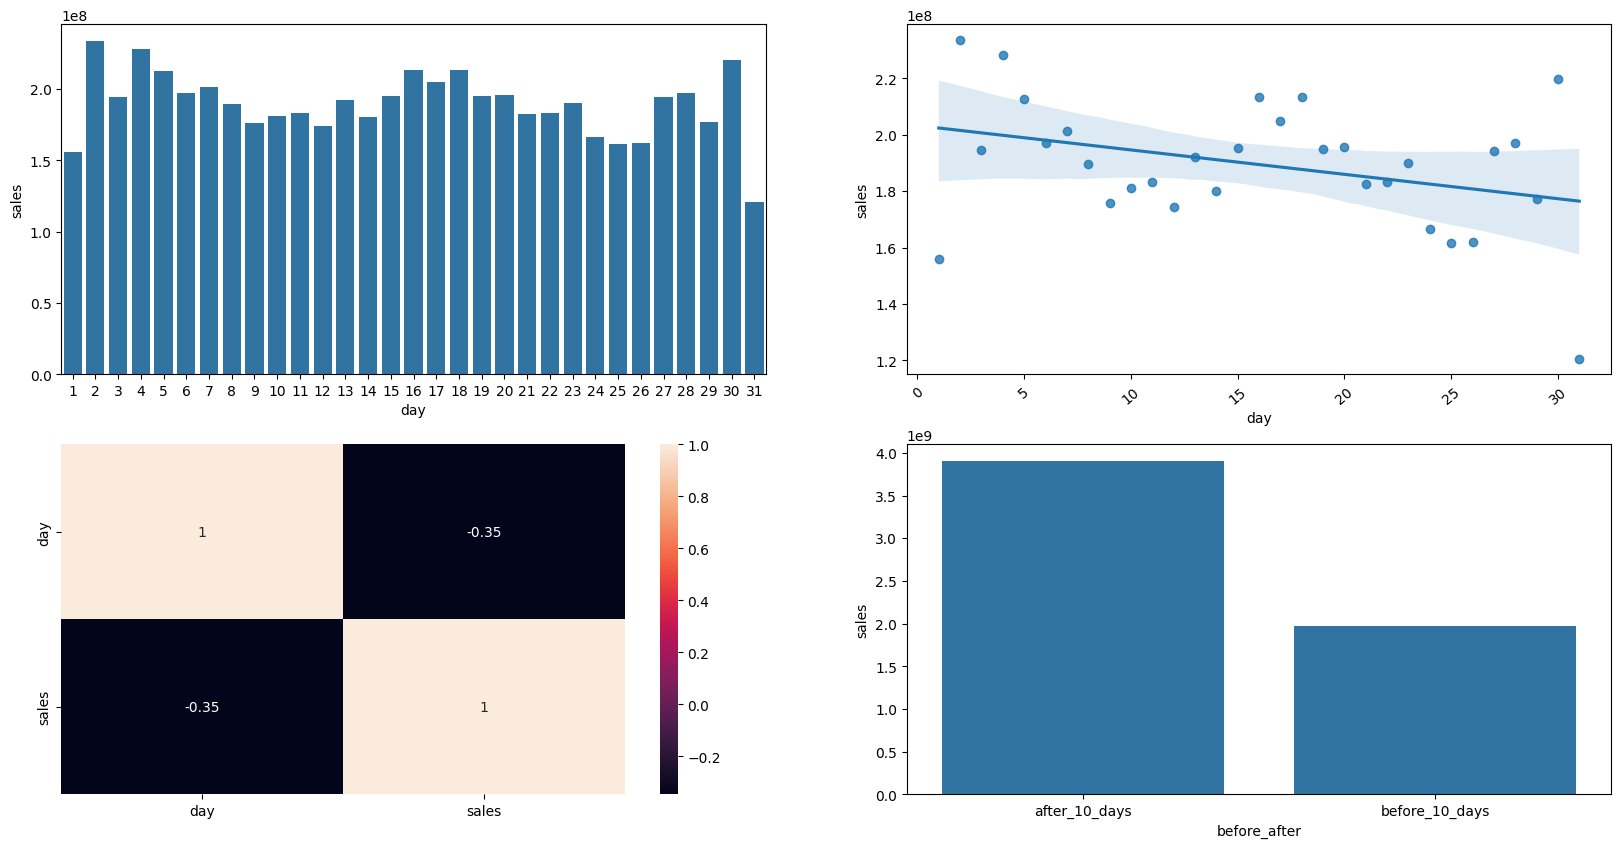

In [56]:
aux1 = df4[['day', 'sales']].groupby( 'day' ).sum().reset_index()
#aux1 = aux1[aux1['year'] != 2015] # retirando 2015 esses dados vão so até agosto de 2015 entao ele vai dar menor venda de qualquer jeito pq o ano ainda nao acobou
 
plt.figure( figsize=[20,10] )
plt.subplot(2, 2, 1)
sns.barplot( x='day', y='sales', data=aux1 )

plt.subplot(2, 2, 2)
sns.regplot( x='day', y='sales', data=aux1 )
plt.xticks( rotation=40 );

plt.subplot(2, 2, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

aux1['before_after'] = aux1['day'].apply( lambda x: 'before_10_days' if x <= 10 else 'after_10_days' )
aux2 = aux1[['before_after', 'sales']].groupby('before_after').sum().reset_index()
plt.subplot(2, 2, 4)
sns.barplot( x='before_after', y='sales', data=aux2 )

### **H11.** Lojas deveriam vender menos aos finais de semana.
**VERDADEIRA:** lojas vendem menos nos finais de semana.

In [57]:
df4['day_of_week'].unique()

array([5, 4, 3, 2, 1, 7, 6])

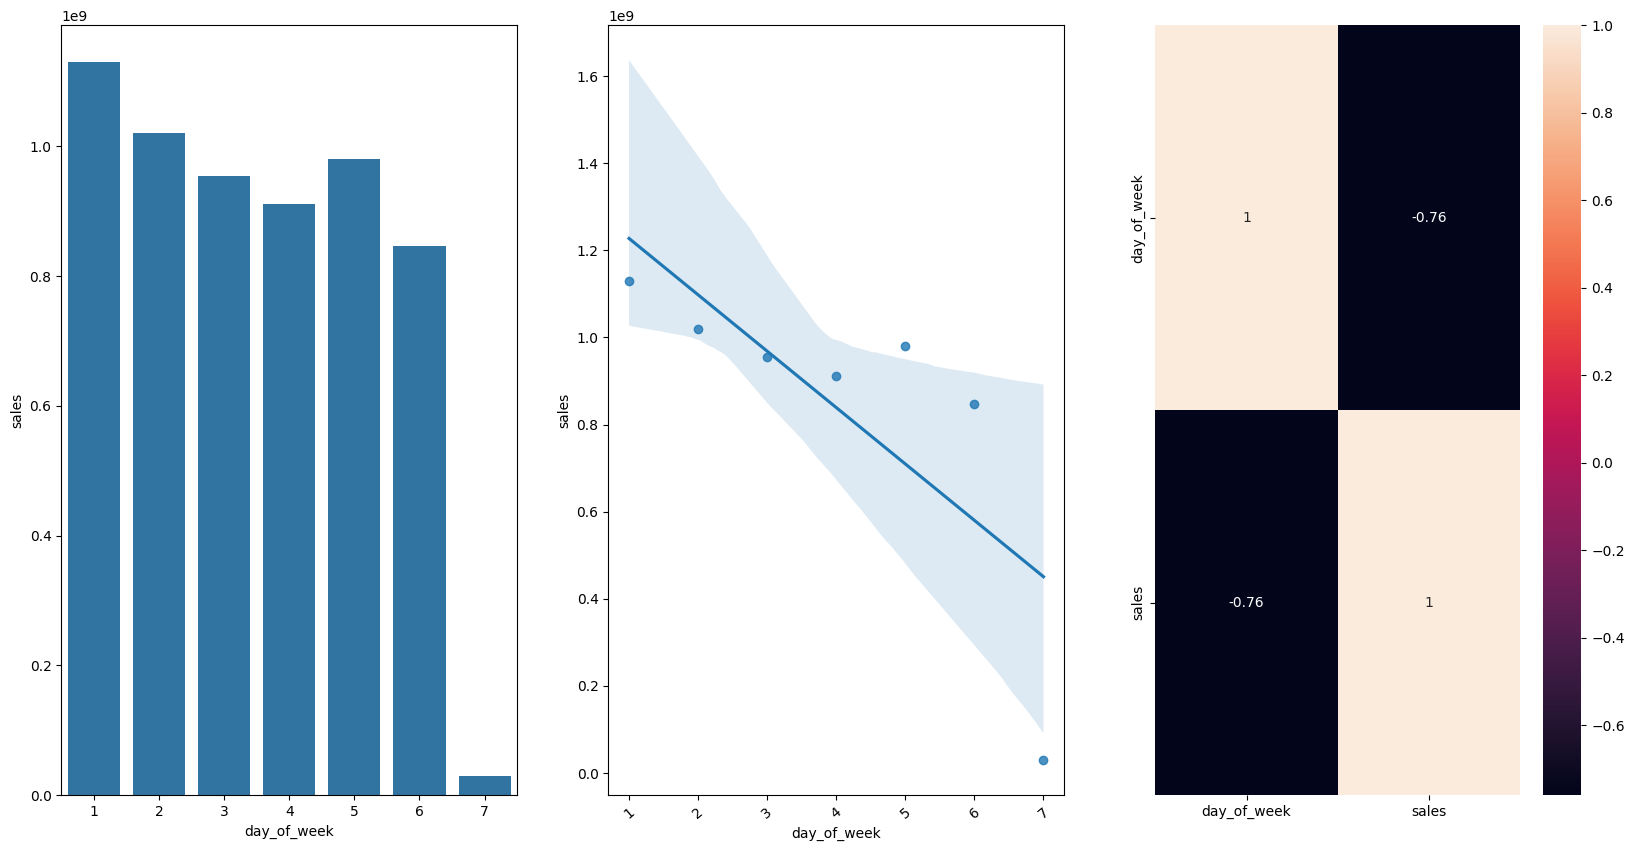

In [58]:
aux1 = df4[['day_of_week', 'sales']].groupby( 'day_of_week' ).sum().reset_index()
#aux1 = aux1[aux1['year'] != 2015] # retirando 2015 esses dados vão so até agosto de 2015 entao ele vai dar menor venda de qualquer jeito pq o ano ainda nao acobou
 
plt.figure( figsize=[20,10] )
plt.subplot(1, 3, 1)
sns.barplot( x='day_of_week', y='sales', data=aux1 )

plt.subplot(1, 3, 2)
sns.regplot( x='day_of_week', y='sales', data=aux1 )
plt.xticks( rotation=40 );

plt.subplot(1, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

### **H12.** Lojas deveriam vender menos durantes feriados escolares.
**VERDADEIRO:** Lojas vendem menos durante os feriados escolares.

**OBS:** no mes de julho as vendas no feriados escolares quase se equiparam e em agosto as vendas no feriados escolares vendem mais  

<Axes: xlabel='month', ylabel='sales'>

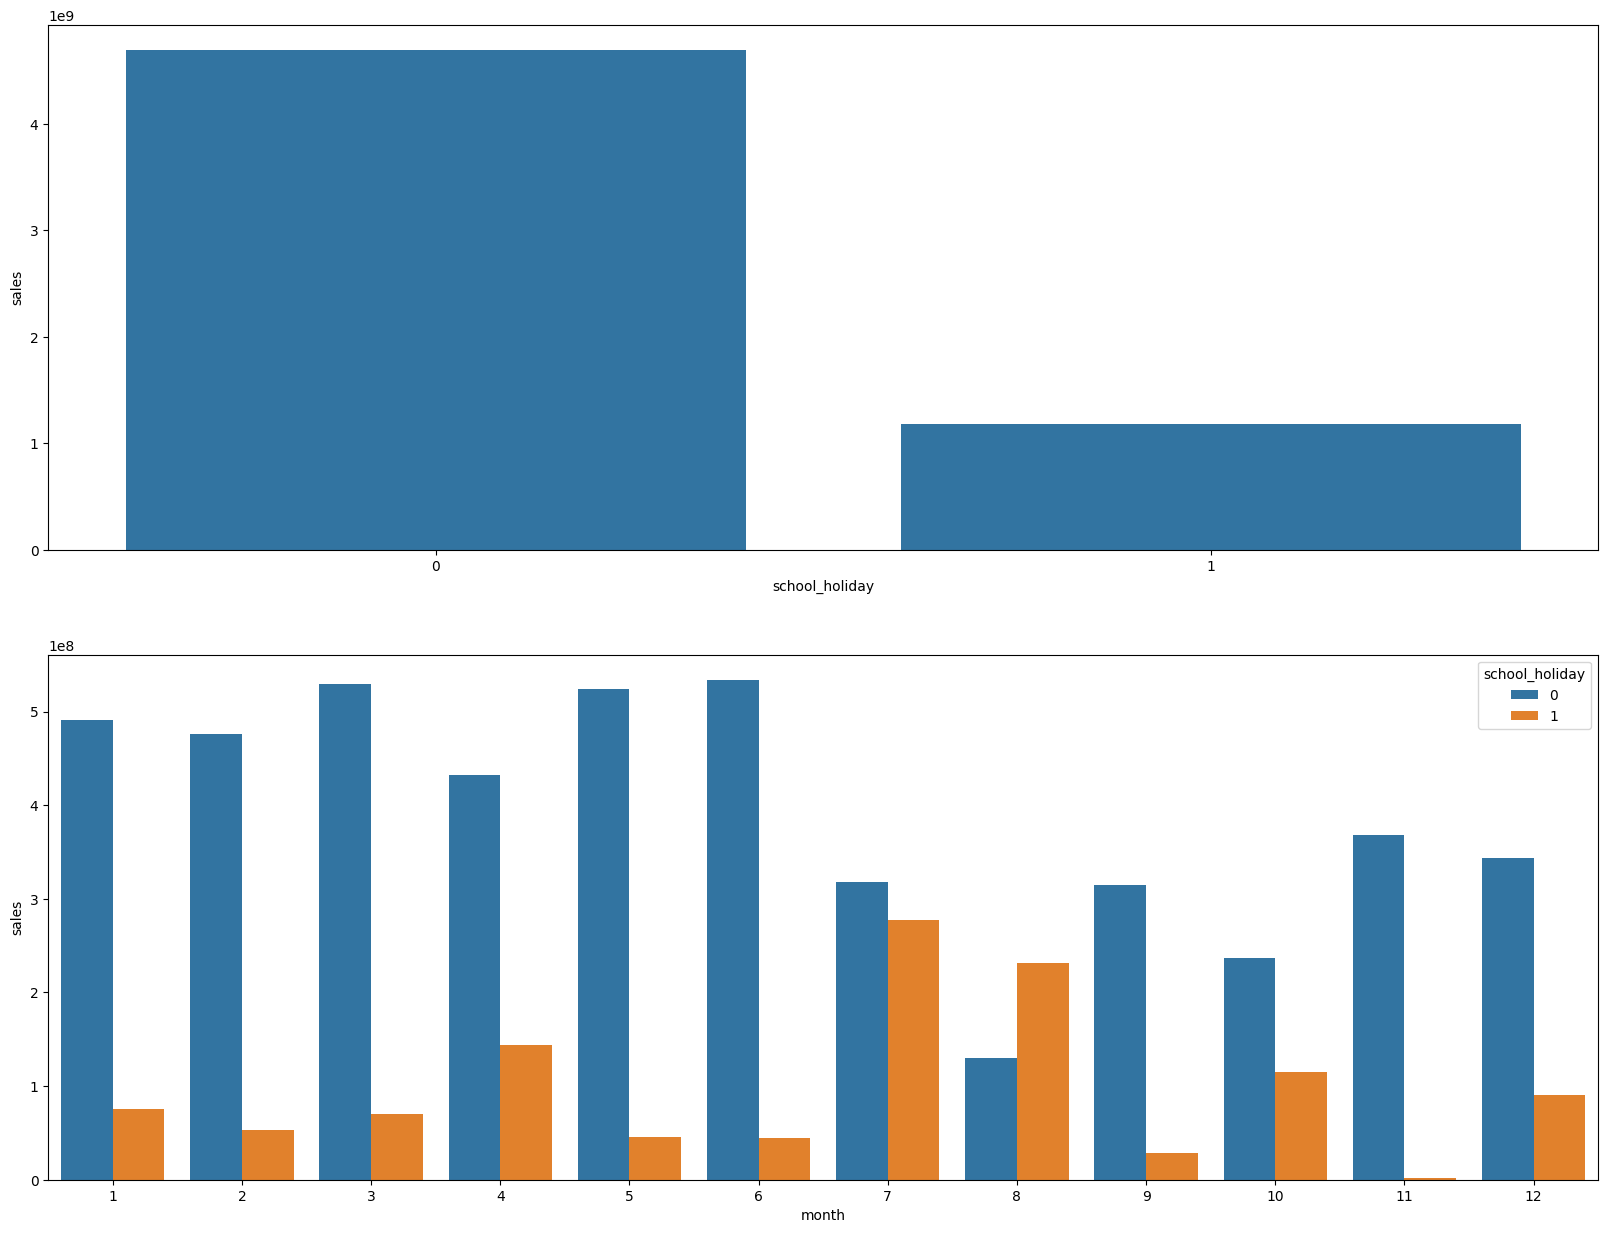

In [59]:
aux1 = df4[['school_holiday', 'sales']].groupby( 'school_holiday' ).sum().reset_index()
#aux1 = aux1[aux1['year'] != 2015] # retirando 2015 esses dados vão so até agosto de 2015 entao ele vai dar menor venda de qualquer jeito pq o ano ainda nao acobou
 
plt.figure( figsize=[20,15] )
plt.subplot(2, 1, 1)
sns.barplot( x='school_holiday', y='sales', data=aux1 )

plt.subplot(2, 1, 2)
aux2 = df4[['month', 'school_holiday', 'sales']].groupby( ['month', 'school_holiday'] ).sum().reset_index()
sns.barplot( x='month', y='sales', hue='school_holiday', data=aux2 )


### 4.2.1 Resumos das Hipoteses

In [60]:
#!pip install tabulate
from tabulate import tabulate

In [61]:
 tab =[['Hipoteses', 'Conclusao', 'Relevancia'],
['H1', 'Falsa', 'Baixa'],
['H2', 'Falsa', 'Media'],
['H3', 'Falsa', 'Media'],
['H4', 'Falsa', 'Baixa'],
['H5', '-', '-'],
['H6', 'Falsa', 'Baixa'],
['H7', 'Falsa', 'Media'],
['H8', 'Falsa', 'Alta'],
['H9', 'Falsa', 'Alta'],
['H10', 'Verdadeira', 'Alta'],
['H11', 'Verdadeira', 'Alta'],
['H12', 'Verdadeira', 'Baixa'],
]
print( tabulate( tab, headers='firstrow' ) )


Hipoteses    Conclusao    Relevancia
-----------  -----------  ------------
H1           Falsa        Baixa
H2           Falsa        Media
H3           Falsa        Media
H4           Falsa        Baixa
H5           -            -
H6           Falsa        Baixa
H7           Falsa        Media
H8           Falsa        Alta
H9           Falsa        Alta
H10          Verdadeira   Alta
H11          Verdadeira   Alta
H12          Verdadeira   Baixa


## 4.3. analise Multivariada:

### 4.3.1 Numerical Attributes

<Axes: >

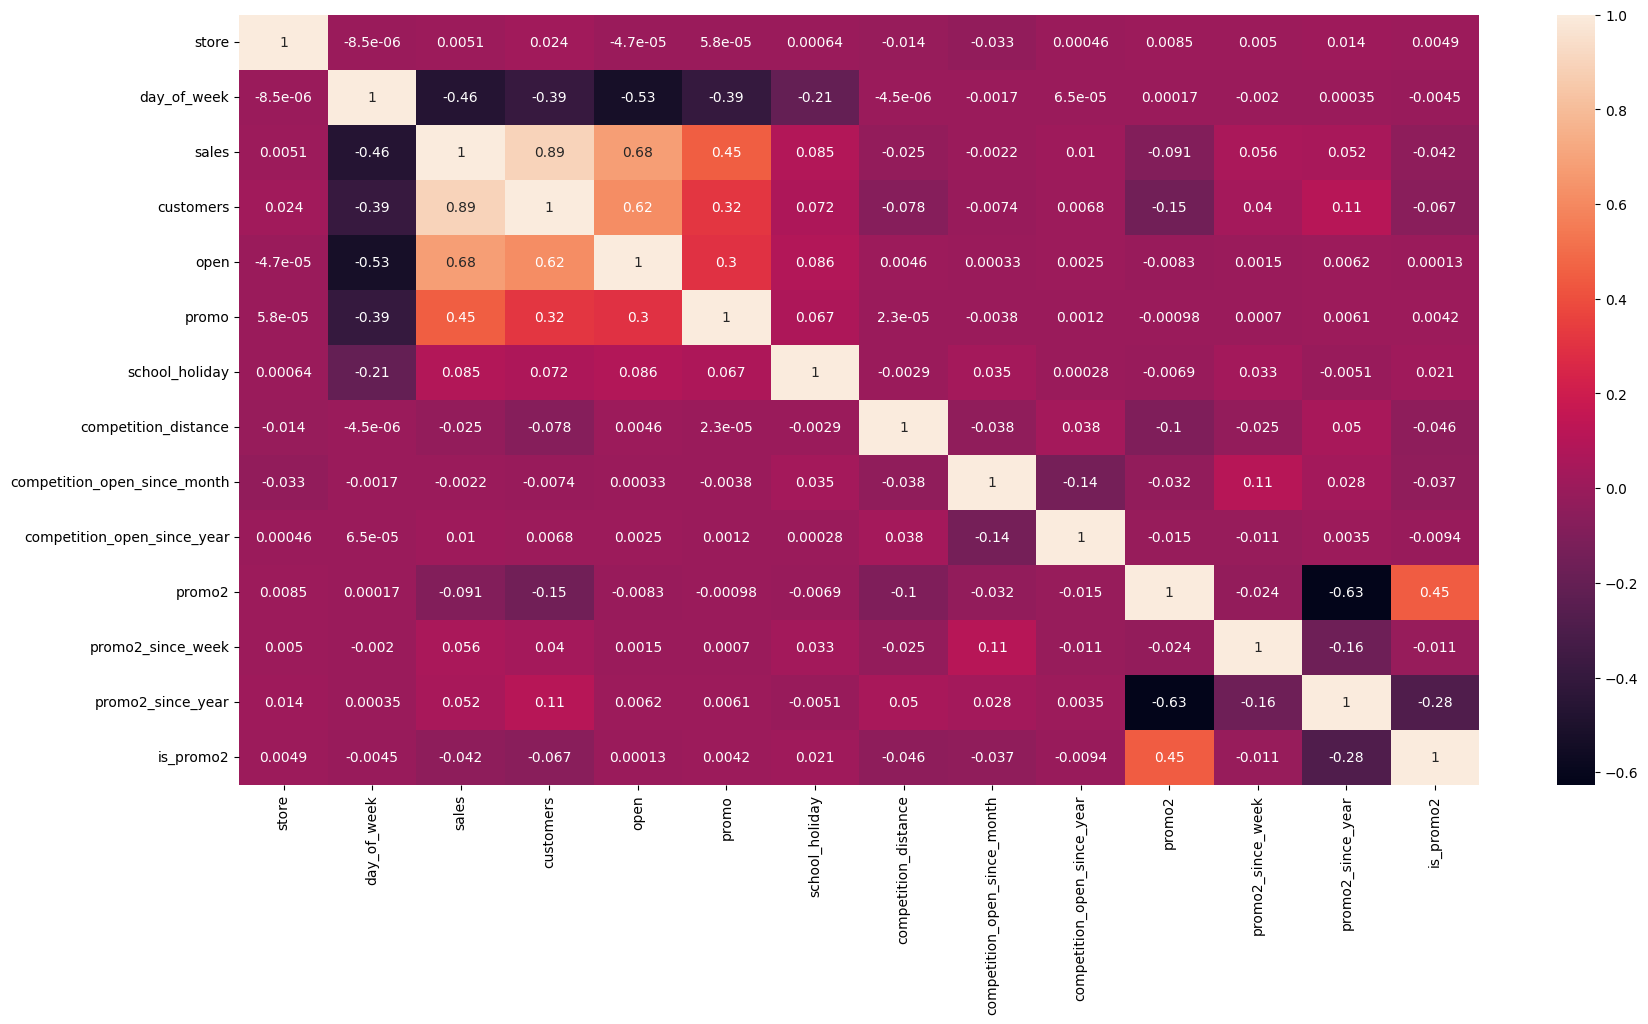

In [67]:
correlation = num_atributes.corr( method='pearson' )
plt.figure(figsize=[20,10])
sns.heatmap( correlation, annot=True )

### 4.3.2 Categorical Attributes

In [68]:
a = df4.select_dtypes( include='object' )
a.head()

,state_holiday,store_type,assortment,year_week
0,regular_day,c,basic,2015-30
1,regular_day,a,basic,2015-30
2,regular_day,a,basic,2015-30
3,regular_day,c,extended,2015-30
4,regular_day,a,basic,2015-30


In [ ]:
v = np.sqrt( ( chi2/n ) / ( min( k-1, r-1 ) ) )